# Lecture 2 - 양자 회로의 측정과 OpenQasm

1. 양자 회로의 측정과 비단일 연산자
2. 양자 회로와 레지스터
3. OpenQasm

## 1. 양자 회로의 측정과 비단일 연산자 (non-unitary operator)

양자 회로에 단일 큐비트 게이트와 다중 큐비트 게이트와 같이 양자 회로에 직접 큐비트에 적용을 시키는 단일 연산자 (unitary oepration)이 있는 반면 비단일 연산자에도 접근을 할 수 있습니다. 비단일 연산자는 주로 아래와 같이 있습니다.
- 측정
- 큐비트의 초기화
- 고전적 조건부 연산자


In [1]:
from qiskit import * # qiskit 라이브러리를 모두 불러옵니다.
from qiskit.quantum_info import Statevector # 양자 상태벡터를 계산하기 위해 qiskit.quantum_info 모듈을 불러옵니다.
from qiskit.visualization import plot_bloch_multivector


***
측정
***

양자 컴퓨터를 측정하기 위해서 모든 정보를 접근할 필요는 없습니다. 양자 상태는 표준 기준으로 나타나게 됩니다. Qiskit에서는 두가지의 방법으로 양자상태를 측정할 수 있으며 양자 비트를 고전 비트로 측정한다 라고 표현할 수 있습니다.
- `QuantumCircuit.measrue(qubit,cbit)`
- `QuantumCircuit.measure_all`

우선은 예를 들기 위해 상태가 1개의 큐비트를 가진 양자 회로를 준비를 해주고 상태가 0인 큐비트를 측정해줍시다.

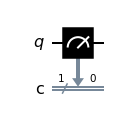

In [2]:
qc = QuantumCircuit(1,1) # qc라는 양자회로를 생성합니다. 1개의 큐비트와 1개의 고전적 비트를 가집니다.
qc.measure(0,0) # 양자 회로에 측정 게이트를 추가합니다. 큐비트 0번을 고전적 비트 0번에 측정합니다.
qc.draw('mpl') # 양자 회로를 그립니다.

In [3]:
backend = BasicAer.get_backend('qasm_simulator') # qasm_simulator를 backend로 설정합니다.
job = backend.run(transpile(qc, backend)) # transpile을 통해 양자회로를 backend에 맞게 변환합니다.
job.result().get_counts(qc) # 양자 회로에서 측정한 결과를 출력합니다.

{'0': 1024}

백엔드에 어떠한 추가적인 설정을 해주지 않는다면 기본적으로 1024번 샷을 보내 측정하여 결과를 불러옵니다. 위의 양자 회로의 같은 경우 1024번 측정을 했을때 100퍼센트의 확률로 1024번 상태가 0인 큐비트의 결과를 얻었습니다. 예상과 동일하게 큐비트에 어떠한 게이트를 넣어주지 않았기 때문에 측정결과 역시 0인 상태가 1024번 나온것을 볼 수 있습니다.

이번에는 큐비트에 하다마드 게이트를 넣어 중첩상태를 만들어 준 다음 양자 회로를 측정해봅시다.

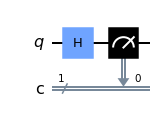

In [4]:
qc = QuantumCircuit(1,1) # qc라는 양자회로를 생성합니다. 1개의 큐비트와 1개의 고전적 비트를 가집니다.
qc.h(0) # 양자 회로에 하다마드 게이트를 큐비트 0번에 추가합니다.
qc.measure(0,0) # 양자 회로에 측정 게이트를 추가합니다. 큐비트 0번을 고전적 비트 0번에 측정합니다.
qc.draw('mpl') # 양자 회로를 그립니다.

In [5]:
job = backend.run(transpile(qc, backend)) # transpile을 통해 양자회로를 backend에 맞게 변환합니다.
job.result().get_counts(qc) # 양자 회로에서 측정한 결과를 출력합니다.

{'0': 529, '1': 495}

이번 양자 회로는 0번째 큐비트가 하다마드 게이트에 의하여 중첩 상태가 되었기 때문에 측정을 했을때 거의 50퍼센트와 가까운 확률로 상태가 0인 결과값과 상태가 1인 결과값을 시뮬레이션을 통해 얻을 수 있습니다.

### measure

`measure` 모듈을 통해 큐비트와 고전비트를 지정하여 원하는 큐비트를 고전 비트에 측정할 수 있습니다.

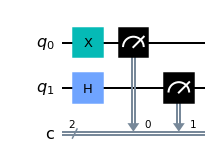

In [6]:
qc=QuantumCircuit(2,2) # qc라는 양자회로를 생성합니다. 2개의 큐비트와 2개의 고전적 비트를 가집니다.
qc.x(0) # 양자 회로에 x 게이트를 큐비트 0번에 추가합니다.
qc.h(1) # 양자 회로에 하다마드 게이트를 큐비트 1번에 추가합니다.
qc.measure(0,0) # 양자 회로에 측정 게이트를 추가합니다. 큐비트 0번을 고전적 비트 0번에 측정합니다.
qc.measure(1,1) # 양자 회로에 측정 게이트를 추가합니다. 큐비트 1번을 고전적 비트 1번에 측정합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [7]:
job = backend.run(transpile(qc, backend)) # transpile을 통해 양자회로를 backend에 맞게 변환합니다.
job.result().get_counts(qc) # 양자 회로에서 측정한 결과를 출력합니다.

{'01': 506, '11': 518}

### measure_all

`measure_all` 모듈을 통해 양자 회로에 있는 모든 큐비트를 측정합니다. 만약 측정을 위한 고전 비트가 지정되어 있지 않다면 양자회로에 새로운 양자 비트를 추가합니다.

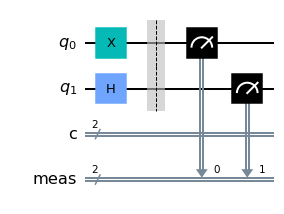

In [8]:
qc=QuantumCircuit(2,2) # qc라는 양자회로를 생성합니다. 2개의 큐비트와 2개의 고전적 비트를 가집니다.
qc.x(0) # 양자 회로에 x 게이트를 큐비트 0번에 추가합니다.
qc.h(1) # 양자 회로에 하다마드 게이트를 큐비트 1번에 추가합니다.
qc.measure_all() # 양자 회로에 측정 게이트를 추가합니다. 모든 큐비트를 고전적 비트에 측정합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [9]:
job = backend.run(transpile(qc, backend)) # transpile을 통해 양자회로를 backend에 맞게 변환합니다.
job.result().get_counts(qc) # 양자 회로에서 측정한 결과를 출력합니다.

{'01 00': 520, '11 00': 504}

위 회로에서는 양자 회로에 측정을 위하 고전 비트를 지정해주지 않았기 때문에 meas라는 이름의 고전 비트가 자동으로 생성되었습니다.

### measure_all과 measure의 차이

만약 양자 회로에 측정을 위한 고전 비트를 지정 해준다면 두개의 큐비트를 가진 qc라는 양자 회로에서 `qc.measure_all()`와 `qc.measure([0,1],[0,1])`을 측정을 위해 사용하게 면 동일한 양자 회로를 만들 수 있습니다. 이 두가지의 양자회로 측정 방법은 고전 비트에 차이점이 있습니다. `measure_all`의 방법은 만약 고전비트가 없거나 측정을 위해 지정되어 있지 않으면 기본적으로 고전비트를 양자회로에 추가 해줍니다. 하지만 반대로 `measure`은 모듈을 사용할때 큐비트와 고전비트를 지정해줘야 하기 때문에 측정 하기전에 미리 양자 회로가 고전 비트를 가지고 있어야 합니다.

***
큐비트의 초기화
***

특정 큐비트를 $|0\rangle$의 상태로 회로 계산 중간에 초기화를 시켜주고 싶다면 `reset`이라는 모듈을 이용할 수 있습니다. 큐비트를 초기화 하게 되면 어떠한 상태의 큐비트를 상태 $|0\rangle$로 만들어 줄 수 있습니다. 참고로 `reset`은 게이트가 아니며 비가역적(irreversible) 입니다.

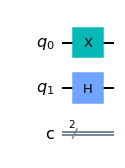

In [10]:
qc=QuantumCircuit(2,2) # qc라는 양자회로를 생성합니다. 2개의 큐비트와 2개의 고전적 비트를 가집니다.
qc.x(0) # 양자 회로에 x 게이트를 큐비트 0번에 추가합니다.
qc.h(1) # 양자 회로에 하다마드 게이트를 큐비트 1번에 추가합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [11]:
state = Statevector.from_instruction(qc) # Statevector을 이용해 양자 회로에서 얻은 상태를 state에 저장합니다.
state.draw(output='latex') # state를 latex로 그립니다.

<IPython.core.display.Latex object>

만약 이러한 상태의 양자 회로의 큐비트에 `reset`을 1번째 큐비트에 사용하게 되면 이렇게 상태가 바뀐것을 확인할 수 있습니다.

In [12]:
qc.reset(1) # 양자 회로의 1번째 큐비트의 상태를 초기화 시킵니다.

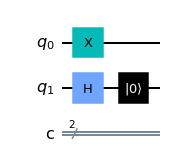

In [13]:
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [14]:
state = Statevector.from_instruction(qc) # Statevector을 이용해 양자 회로에서 얻은 상태를 state에 저장합니다.
state.draw(output='latex') # state를 latex로 그립니다.

<IPython.core.display.Latex object>

`reset`에 의하여 중첩 상태였던 1번째 큐비트가 0이 된것을 확인할 수 있습니다.

이러한 초기화 기능은 양자회로 마지막이 아닌 중간에서도 사용할 수 있습니다.

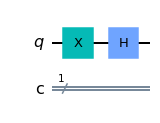

In [15]:
qc=QuantumCircuit(1,1) # qc라는 양자회로를 생성합니다. 1개의 큐비트와 1개의 고전적 비트를 가집니다.
qc.x(0)  # 양자 회로에 x 게이트를 큐비트 0번에 추가합니다.
qc.h(0)  # 양자 회로에 하다마드 게이트를 큐비트 0번에 추가합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [16]:
state = Statevector.from_instruction(qc) # Statevector을 이용해 양자 회로에서 얻은 상태를 state에 저장합니다.
state.draw(output='latex') # state를 latex로 그립니다.

<IPython.core.display.Latex object>

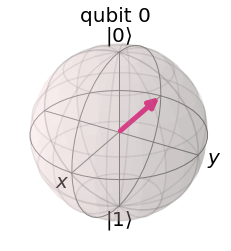

In [17]:
plot_bloch_multivector(state)

만약 초기화를 X 게이트 다음에 사용하게 된다면 회로의 결과값이 아래와 같이 변화게 됩니다.

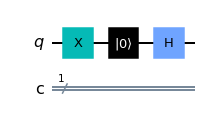

In [18]:
qc=QuantumCircuit(1,1) # qc라는 양자회로를 생성합니다. 1개의 큐비트와 1개의 고전적 비트를 가집니다.
qc.x(0)  # 양자 회로에 x 게이트를 큐비트 0번에 추가합니다.
qc.reset(0) # 양자 회로의 0번째 큐비트의 상태를 초기화 시킵니다.
qc.h(0)  # 양자 회로에 하다마드 게이트를 큐비트 0번에 추가합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [19]:
state = Statevector.from_instruction(qc) # Statevector을 이용해 양자 회로에서 얻은 상태를 state에 저장합니다.
state.draw(output='latex') # state를 latex로 그립니다.

<IPython.core.display.Latex object>

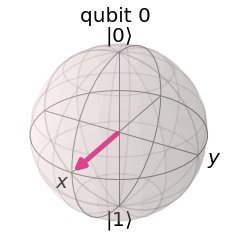

In [20]:
plot_bloch_multivector(state)

결과 값을 보게 되면 마지막 결과가 상태가 0이 였던 큐비트에 하다마드 게이트를 적용한 것과 동일한 결과를 내보낸것을 볼 수 있습니다.


***
고전적 조건부 연산자
***

고전적 조건부 연산자 `c_if`을 사용하여 특정 고전 비트의 상태였을때 연산자를 실행 할 수 있게 할 수 있습니다. 고전적 조건부 연산자는 `c_if(classical bit, value)`를 사용하여 고전적 비트를 지정하고 그 비트가 `value` 상태 일때 연산자를 실행 할 수 있게 조건부 연산자를 만듭니다.

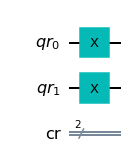

In [21]:
qr=QuantumRegister(2,'qr') # qr이라는 양자 레지스터를 생성합니다. 큐비트 2개를 가집니다.
cr=ClassicalRegister(2,'cr') # cr이라는 고전적 레지스터를 생성합니다. 고전적 비트 2개를 가집니다.

qc=QuantumCircuit(qr,cr) # qc라는 양자회로를 생성합니다. qr과 cr을 이용해 양자회로를 생성합니다.
qc.x(0) # 양자 회로에 x 게이트를 큐비트 0번에 추가합니다.
qc.x(1) # 양자 회로에 x 게이트를 큐비트 1번에 추가합니다.
qc.draw(output="mpl") # 양자 회로를 그립니다.

In [22]:
state = Statevector.from_instruction(qc) # Statevector을 이용해 양자 회로에서 얻은 상태를 state에 저장합니다.
state.draw(output='latex') # state를 latex로 그립니다.

<IPython.core.display.Latex object>

이러한 양자 회로에 고전 조건부 연산자 `c_if`를 추가하여 1번째 큐비트의 상태가 0일떼 S 게이트를 실행 할 수 있게 만들어 줍시다.

In [23]:
qc.s(qr[1]).c_if(cr,0) # 양자 회로에 s 게이트를 qr 양자 레지스터의 큐비트 1번에 추가합니다. cr 고전 레지스터의 0번째 비트가 0일 때만 실행됩니다.

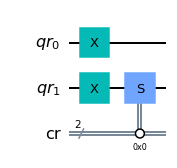

In [24]:
qc.draw(output="mpl") # 양자 회로를 그립니다.

In [25]:
state = Statevector.from_instruction(qc) # Statevector을 이용해 양자 회로에서 얻은 상태를 state에 저장합니다.
state.draw(output='latex') # state를 latex로 그립니다.

<IPython.core.display.Latex object>

이번에는 또 다른 양자 회로를 만들어 고전 조건부 연산자를 사용해 봅시다. 이번 양자 회로에서는 먼저 하다마드 게이트를 이용해 중첩 상태로 만들어 줍니다. 만약 중첩된 큐비트의 상태가 0이라면 X 게이트를 실행시키는 양자 회로를 만들어봅시다.

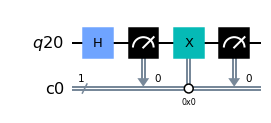

In [26]:
q = QuantumRegister(1) # q라는 양자 레지스터를 생성합니다. 큐비트 1개를 가집니다.
c = ClassicalRegister(1) # c라는 고전적 레지스터를 생성합니다. 고전적 비트 1개를 가집니다.

qc = QuantumCircuit(q, c) # qc라는 양자회로를 생성합니다. q와 c를 이용해 양자회로를 생성합니다.
qc.h(q) # 양자 회로에 하다마드 게이트를 q 양자 레지스터의 큐비트 0번에 추가합니다.
qc.measure(q,c) # 양자 회로에 측정 게이트를 q 양자 레지스터의 큐비트 0번에 추가합니다. c 고전 레지스터의 비트 0번에 측정 결과를 저장합니다.
qc.x(q[0]).c_if(c, 0) # 양자 회로에 x 게이트를 q 양자 레지스터의 큐비트 0번에 추가합니다. c 고전 레지스터의 0번째 비트가 0일 때만 실행됩니다.
qc.measure(q,c) # 양자 회로에 측정 게이트를 q 양자 레지스터의 큐비트 0번에 추가합니다. c 고전 레지스터의 비트 0번에 측정 결과를 저장합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

In [27]:
job = backend.run(transpile(qc, backend)) # backend를 이용해 qc를 실행합니다.
job.result().get_counts(qc) # qc의 실행 결과를 출력합니다.

{'1': 1024}

결과값을 보게 되면 만약 중첩된 상태를 측정했을때 상태가 0이 되면 조건부 연산자로 인해 X 게이트가 적용되여 최종 상태가 1이 됩니다. 만약 중첩 상태의 측정값이 1이라면 조건부 연산자가 작동 하지 않게 되어 최종 상태가 1이 되어 결과적으로 양자 회로는 모두 상태가 $|1\rangle$인 결과 값을 내보내게 됩니다.

## 2. 양자 회로와 레지스터

<iframe width="727" height="409" src="https://www.youtube.com/embed/IvhqbvsSrjU?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e" title="What are registers? 1 Minute Qiskit" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[Youtube](https://www.youtube.com/embed/IvhqbvsSrjU?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e)

- 양자 레지스터
- 고전 레지스터
- 양자 회로
    - compose
    - decompose

***
양자 레지스터
***

양자 레지스터는 `QuantumRegister`을 이용하여 양자 레지스터를 지정해 줄 수 있습니다. 사용법은 `QuantumRegister(number of qubits, name=optional)`의 문법을 따라 사용할 수 있습니다.

만약 `name`을 지정해주지 않는다면 기본 이름이 주어집니다.

In [28]:
q=QuantumRegister(2) # q라는 양자 레지스터를 생성합니다. 큐비트 2개를 가집니다.
q

QuantumRegister(2, 'q27')

`name`을 지정해줘서 양자 레지스터의 이름을 만들어 지정해줄 수 있습니다.

In [29]:
q=QuantumRegister(2, 'qr') # q라는 qr이라는 이름을 가진 양자 레지스터를 생성합니다. 큐비트 2개를 가집니다.
q

QuantumRegister(2, 'qr')

***
고전 레지스터
***

고전 레지스터는 `ClassicalRegister`을 이용하여 고전 레지스터를 만들 수 있습니다. 사용법은 `ClassicalRegister(number of classical bits, name=optional)`의 문법을 따라 사용할 수 있습니다.

In [30]:
c=ClassicalRegister(2)
c

ClassicalRegister(2, 'c1')

In [31]:
c=ClassicalRegister(2,'cr')
c

ClassicalRegister(2, 'cr')

***
양자 회로
***

양자 회로는 `QuantumCircuit(registers, name=optional)`을 이용하여 만들 수 있습니다. 만약 2개의 큐비트와 2개의 고전 비트를 가진 양자 회로를 만들려면 여러가지의 방법이 있습니다.

#### 방법 1

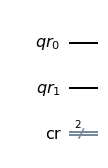

In [32]:
q=QuantumRegister(2,'qr') # q라는 qr이라는 이름을 가진 양자 레지스터를 생성합니다. 큐비트 2개를 가집니다.
c=ClassicalRegister(2,'cr') # c라는 cr이라는 이름을 가진 고전적 레지스터를 생성합니다. 고전적 비트 2개를 가집니다.
qc=QuantumCircuit(q,c) # qc라는 양자회로를 생성합니다. q와 c를 이용해 양자회로를 생성합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

#### 방법 2

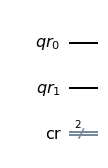

In [33]:
qc=QuantumCircuit(QuantumRegister(2,'qr'),ClassicalRegister(2,'cr')) # qc라는 양자회로를 생성합니다. 큐비트 2개를 가진 qr이라는 이름을 가진 양자 레지스터와 고전적 비트 2개를 가진 cr이라는 이름을 가진 고전적 레지스터를 이용해 양자회로를 생성합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

#### 방법 3

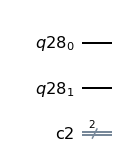

In [34]:
qc=QuantumCircuit(QuantumRegister(2),ClassicalRegister(2)) # qc라는 양자회로를 생성합니다. 큐비트 2개를 가진 양자 레지스터와 고전적 비트 2개를 가진 고전적 레지스터를 이용해 양자회로를 생성합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

#### 방법 4

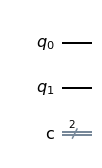

In [35]:
qc=QuantumCircuit(2,2) # qc라는 양자회로를 생성합니다. 큐비트 2개와 고전적 비트 2개를 가진 양자회로를 생성합니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

### compose

여러가지의 양자 회로를 합쳐 하나의 회로로 만들어 줄 수 있습니다. 

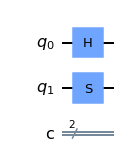

In [36]:
qc1=QuantumCircuit(2,2) # qc1이라는 양자회로를 생성합니다. 큐비트 2개와 고전적 비트 2개를 가진 양자회로를 생성합니다.
qc1.h(0) # qc1의 0번째 큐비트에 하다마드 게이트를 적용합니다.
qc1.s(1) # qc1의 1번째 큐비트에 s 게이트를 적용합니다.
qc1.draw(output='mpl') # 양자 회로를 그립니다.

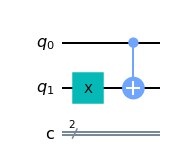

In [37]:
qc2=QuantumCircuit(2,2) # qc2라는 양자회로를 생성합니다. 큐비트 2개와 고전적 비트 2개를 가진 양자회로를 생성합니다.
qc2.x(1) # qc2의 1번째 큐비트에 x 게이트를 적용합니다.
qc2.cx(0,1) # qc2의 0번째 큐비트와 1번째 큐비트에 제어x 게이트를 적용합니다.
qc2.draw(output='mpl') # 양자 회로를 그립니다.


`+`를 이용하여 양자 회로 합치기

/var/folders/bz/9tqsqmh90592y3_wn1lrvm040000gn/T/ipykernel_14063/1362999139.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc=qc1+qc2 # qc1 양자회로와 qc2 양자회로를 합쳐 qc라는 양자회로를 만듭니다.


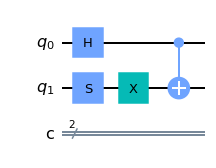

In [38]:
qc=qc1+qc2 # qc1 양자회로와 qc2 양자회로를 합쳐 qc라는 양자회로를 만듭니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.


`compose()`를 이용하여 양자 회로를 합칠 수 있습니다.

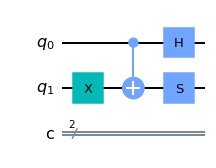

In [39]:
qc=qc2.compose(qc1) # qc2 양자회로를 왼쪽에 qc1 양자회로 오른쪽에 합쳐 qc라는 양자회로를 만듭니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

반대로 `qc1`과 `qc2`의 양자 회로를 반대로 적용하여 실행하면 아래와 같은 양자 회로를 만들 수 있습니다.

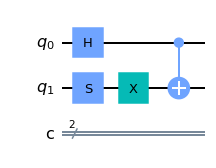

In [40]:
qc=qc1.compose(qc2) # qc1 양자회로를 왼쪽에 qc2 양자회로 오른쪽에 합쳐 qc라는 양자회로를 만듭니다.
qc.draw(output='mpl') # 양자 회로를 그립니다.

### decompose

`decompose`를 이용하여 양자 회로를 한단계 아래로 분해할 수 있습니다. 

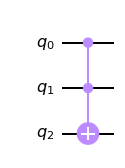

In [41]:
qc = QuantumCircuit(3) # qc라는 양자회로를 생성합니다. 큐비트 3개를 가진 양자회로를 생성합니다.
qc.ccx(0,1,2) # qc의 0번째 큐비트와 1번째 큐비트를 제어로 하는 2번째 큐비트에 토폴리 게이트를 적용합니다.
qc.draw(output="mpl") # 양자 회로를 그립니다.

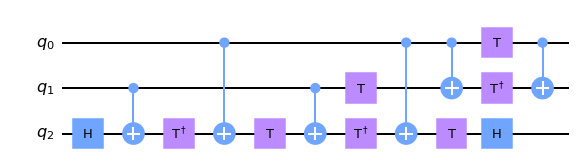

In [42]:
qc.decompose().draw(output="mpl") # 양자 회로를 1단계 분해하여 그립니다.

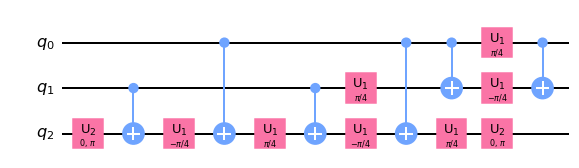

In [43]:
qc.decompose().decompose().draw(output="mpl") # 양자 회로를 2단계 분해하여 그립니다.

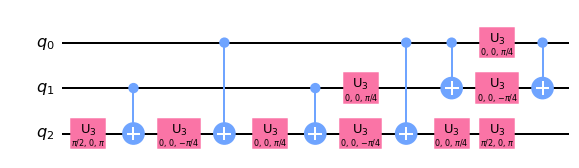

In [44]:
qc.decompose().decompose().decompose().draw(output="mpl") # 양자 회로를 3단계 분해하여 그립니다.

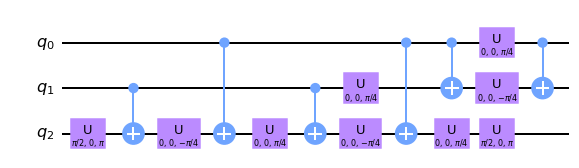

In [45]:
qc.decompose().decompose().decompose().decompose().draw(output="mpl") # 양자 회로를 4단계 분해하여 그립니다.

## 3. OpenQasm

<iframe width="727" height="409" src="https://www.youtube.com/embed/wG94YHKDIxc?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e" title="How can I convert a quantum circuit to and from QASM? 1 Minute Qiskit" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


[Youtube](https://www.youtube.com/embed/wG94YHKDIxc?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e)

OpenQasm이란 Open Quantum Assembly Language의 약자이며 양자 지시의 중간 표현 입니다. 어셈블리어 인만큼 Verilog와 비슷하게 더욱 하드웨어 친화적인 언어 입니다. Qiskit에서 만든 양자 회로를 `qasm` 모듈을 이용하여 더욱 하드웨어 친화적인 OpenQasm으로 바꿔줄 수 있습니다. 

우선 qc라는 양자 회로를 만들어 줍시다.

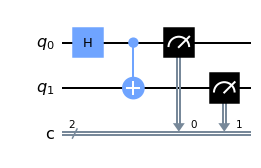

In [46]:
qc = QuantumCircuit(2,2) # qc라는 양자회로를 생성합니다. 큐비트 2개와 고전적 비트 2개를 가진 양자회로를 생성합니다.
qc.h(0) # qc의 0번째 큐비트에 하다마드 게이트를 적용합니다.
qc.cx(0,1) # qc의 0번째 큐비트를 control 큐비트로 1번째 큐비트를 target 게이트로 적용하여 CX 게이트를 추가합니다.
qc.measure(0,0) # qc의 0번째 큐비트를 0번째 고전 비트에 측정합니다.
qc.measure(1,1) # qc의 1번째 큐비트를 1번째 고전 비트에 측정합니다.
qc.draw(output="mpl") # 양자 회로를 그립니다.

`qasm`을 이용해서 qasm형태로 양자 회로를 만들어 줍시다.

In [47]:
qc.qasm() # 양자 회로를 QASM 코드로 출력합니다.

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\ncx q[0],q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n'

In [48]:
print(qc.qasm()) # 양자 회로를 QASM 코드로 더욱 정리 된 형태로 출력합니다.

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [49]:
qc.qasm(formatted=True) # 양자 회로를 QASM 코드로 또 다른 방법으로 더욱 정리 된 형태로 출력합니다.

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



qasm으로 변환된 양자 회로를 `qasm`형태로 저장할 수 있습니다.

In [50]:
qc_qasm = qc.qasm(filename='sample.qasm') # 양자 회로를 QASM 코드로 sample.qasm 파일로 저장합니다.
print(qc_qasm) # 양자 회로를 QASM 코드로 출력합니다.

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



이제 다시 `from_qasm_file`을 이용해 저장했던 qasm 파일을 불러와서 양자 회로로 만들어 사용해줍시다.

In [51]:
qc2 = QuantumCircuit.from_qasm_file("./sample.qasm") # sample.qasm 파일을 불러와서 qc라는 양자회로를 생성합니다.

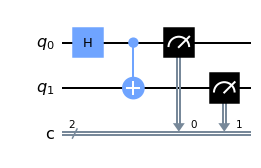

In [52]:
qc2.draw(output="mpl") # 양자 회로를 그립니다.

출력된 양자 회로를 통해 qasm으로 변형되어 저장되었던 양자 회로를 성공적으로 불러온것을 확인할 수 있습니다.

In [53]:
import qiskit.tools.jupyter
%qiskit_version_table #qiskit 버전 표시하기